In [92]:
import numpy as np
from adaline import adaline
from pandas import DataFrame
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [93]:
train_data = np.random.uniform(-100, 100, (10000, 2))
train_label = train_data[:,1] > 1

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,-85.2704,-34.794,False
1,-14.352,-80.0842,False
2,-41.5699,21.9454,True
3,-21.7239,80.2224,True
4,89.9396,-36.205,False
...,...,...,...
9995,19.268,-82.747,False
9996,29.0672,90.1393,True
9997,55.0449,50.852,True
9998,37.0576,-90.7107,False


In [94]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-5.14331892, 86.67564275])

In [95]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.9831

In [96]:
test_data =  np.random.uniform(-100, 100, (1000, 2))
test_label = test_data[:,1] > 1

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(test_label, pred)

0.985

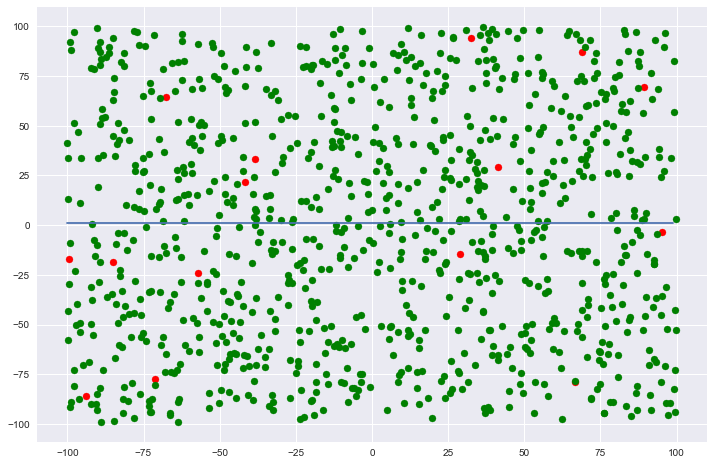

In [97]:
mistakes = train_data[np.where((test_label == pred) == False)]
success = train_data[np.where((test_label == pred) == True)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

In [46]:
#looks pretty random